In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
data_set=files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [5]:
data_set = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [8]:
data_set.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007
112633,YV4BR0CL8N,King,Covington,WA,98042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,47.0,194673692,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032005


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [9]:
data_set.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data_set=data_set.dropna()

In [ ]:
data_set.isna().sum()

# Adoption time

In [ ]:
data_set_by_year=data_set['Model Year'].value_counts().sort_index()
print(data_set_by_year)

Model Year
1997        1
1998        1
1999        3
2000       10
2002        2
2008       23
2010       24
2011      835
2012     1695
2013     4669
2014     3665
2015     4918
2016     5709
2017     8598
2018    14190
2019    10216
2020    10998
2021    18277
2022    26455
2023     1863
Name: count, dtype: int64


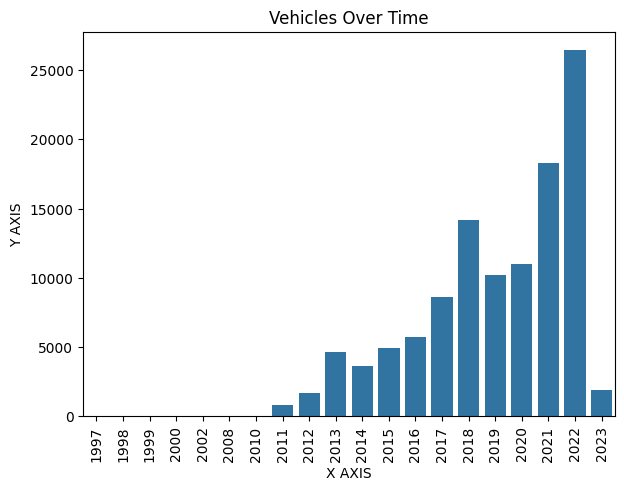

In [ ]:
sns.barplot(x=data_set_by_year.index,y=data_set_by_year.values,legend=False) #,legend=False
plt.title('Vehicles Over Time')
plt.xlabel('X AXIS')
plt.ylabel('Y AXIS')
plt.tight_layout() #plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Geographical Distribution at the county level

In [32]:
data_set.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
ev_county_distr=data_set['County'].value_counts()
top_cities=ev_county_distr.head(3).index

1. based on top countries

In [33]:
top_counties_data=data_set[data_set['County'].isin(top_counties)]
ev_distribution_top_counties=top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_cities=ev_distribution_top_counties.head(10)



NameError: name 'top_counties' is not defined

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',data=top_cities,hue='County',palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

NameError: name 'top_cities' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',data=top_cities,hue='County',palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.indexes.base.Index'>.

<Figure size 1200x800 with 0 Axes>

# Analyzying distribution of different EV types

1. battery vehicles
2. plug in hybrid vehicles

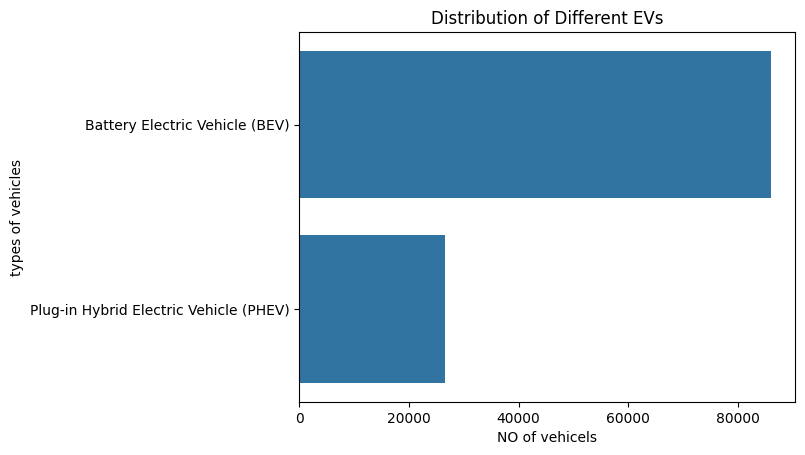

In [12]:
ev_types=data_set['Electric Vehicle Type'].value_counts()
plt.figure()
sns.barplot(x=ev_types,y=ev_types.index)
plt.title("Distribution of Different EVs")
plt.xlabel("NO of vehicels")
plt.ylabel("types of vehicles")
plt.show()

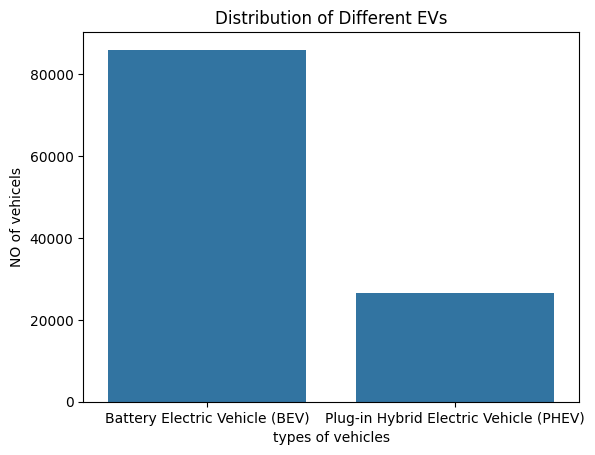

In [13]:
ev_types=data_set['Electric Vehicle Type'].value_counts()
plt.figure()
sns.barplot(x=ev_types.index,y=ev_types,)
plt.title("Distribution of Different EVs")
plt.ylabel("NO of vehicels")
plt.xlabel("types of vehicles")
plt.show()

# Analyzing popularity of EV Manufacturers

/tmp/ipython-input-1379225873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution,palette="cubehelix")


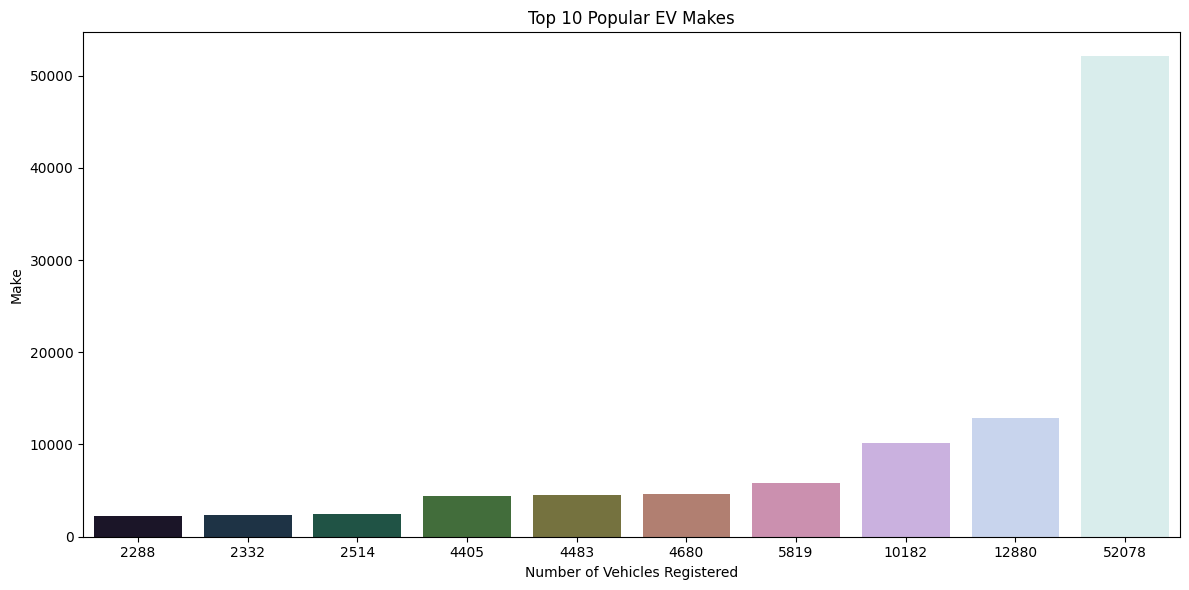

In [21]:
ev_make_distribution=data_set['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution,palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()

plt.show()

# Top Models in Top 3 Makes by EV Registrations

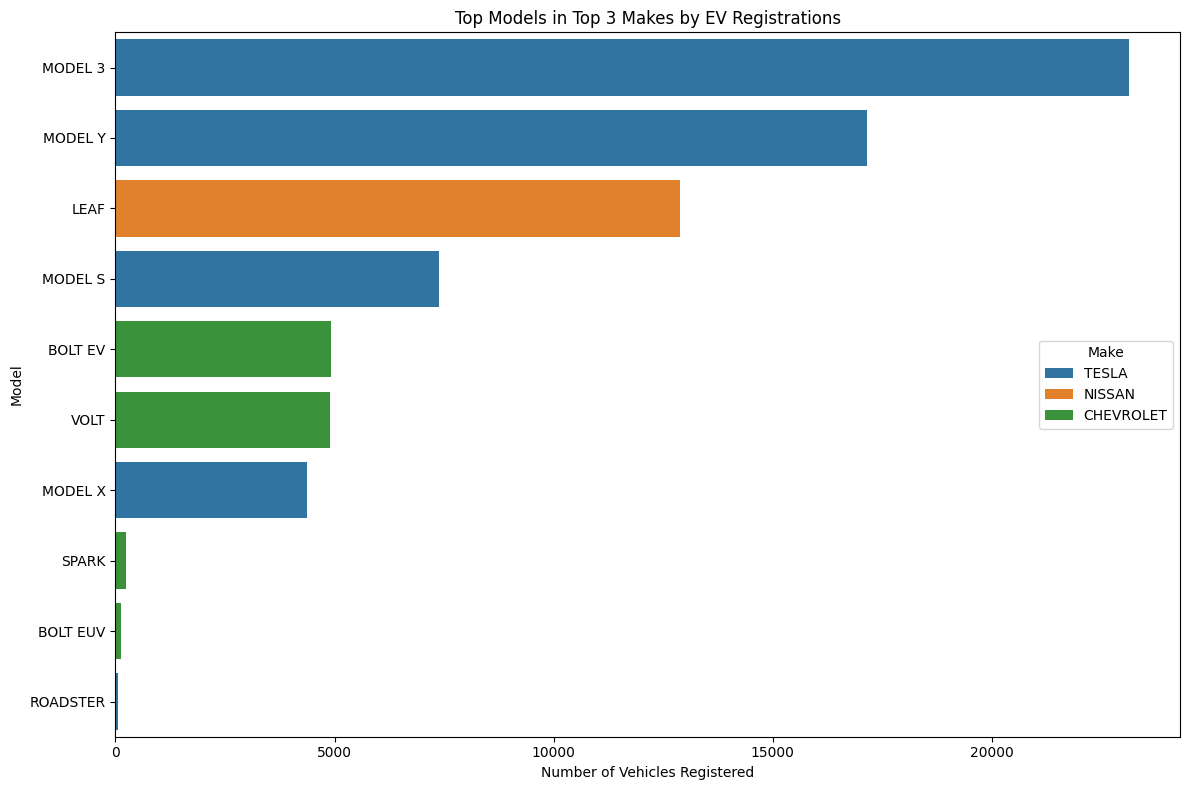

In [23]:
top_3=ev_make_distribution.head(3).index
top_makes_data=data_set[data_set['Make'].isin(top_3)]
ev_distribution_top_makes= top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models=ev_distribution_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='Model',hue='Make',data=top_models)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()


# analyzing the distribution of electric range

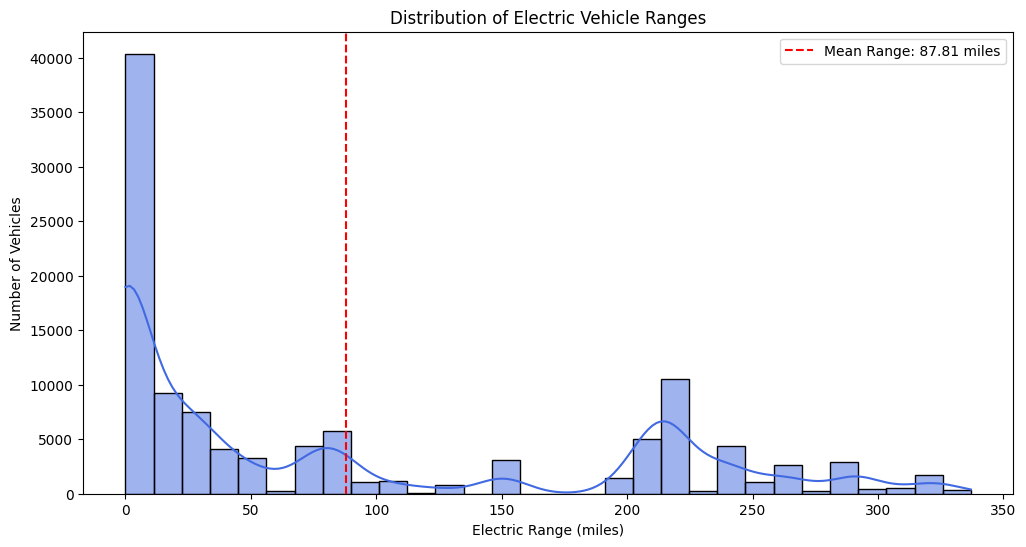

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data_set['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data_set['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data_set["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

# calculating the average electric range by model year

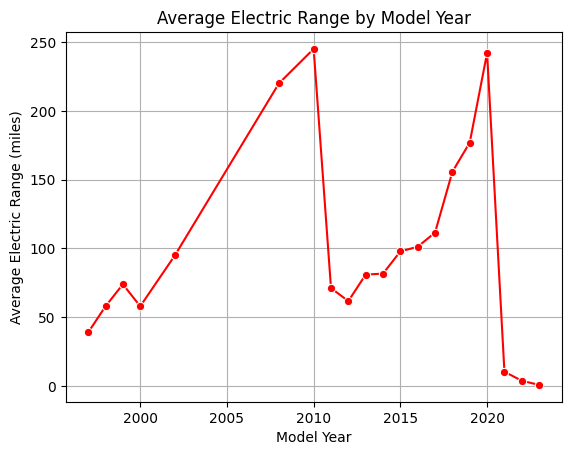

In [26]:
avg_range_by_year=data_set.groupby('Model Year')['Electric Range'].mean().reset_index()
sns.lineplot(x='Model Year',y='Electric Range',data=avg_range_by_year,marker='o',color='red')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

# electric ranges vary among the top manufacturers and models

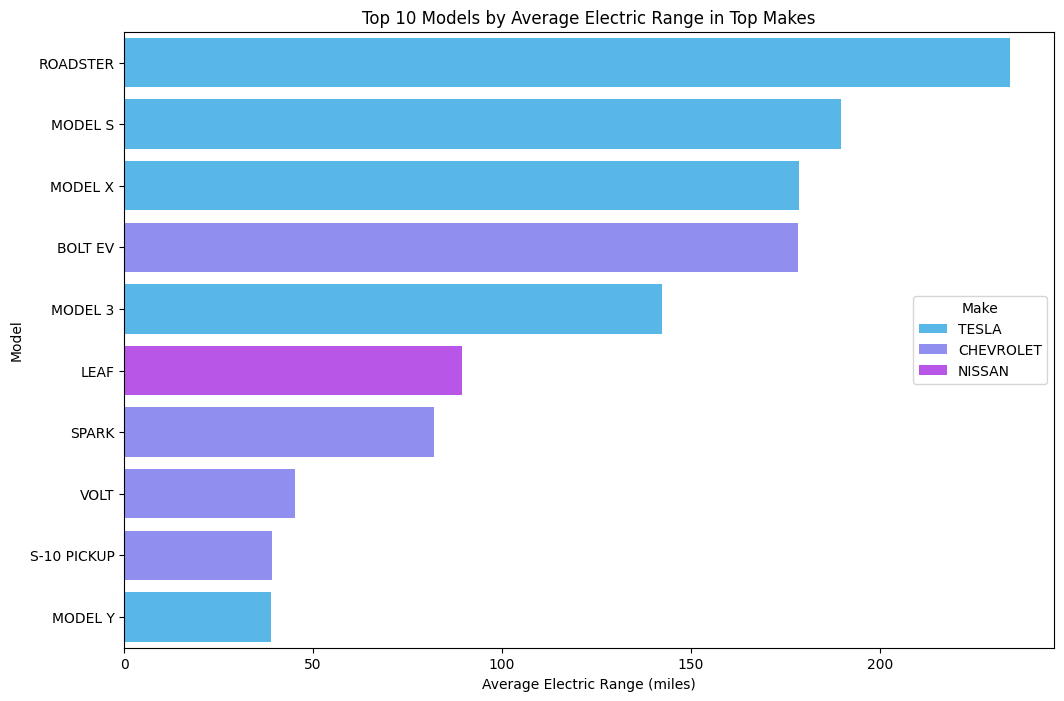

In [27]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [28]:
# calculate the number of EVs registered each year
ev_registration_counts = data_set['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1997,1
1998,1
1999,3
2000,10
2002,2
2008,23
2010,24
2011,840
2012,1705


In [30]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{np.int64(2024): np.float64(19110.567867557074), np.int64(2025): np.float64(21801.881689930688), np.int64(2026): np.float64(24872.20937210674), np.int64(2027): np.float64(28374.926891545816), np.int64(2028): np.float64(32370.927087945), np.int64(2029): np.float64(36929.67825214949)}


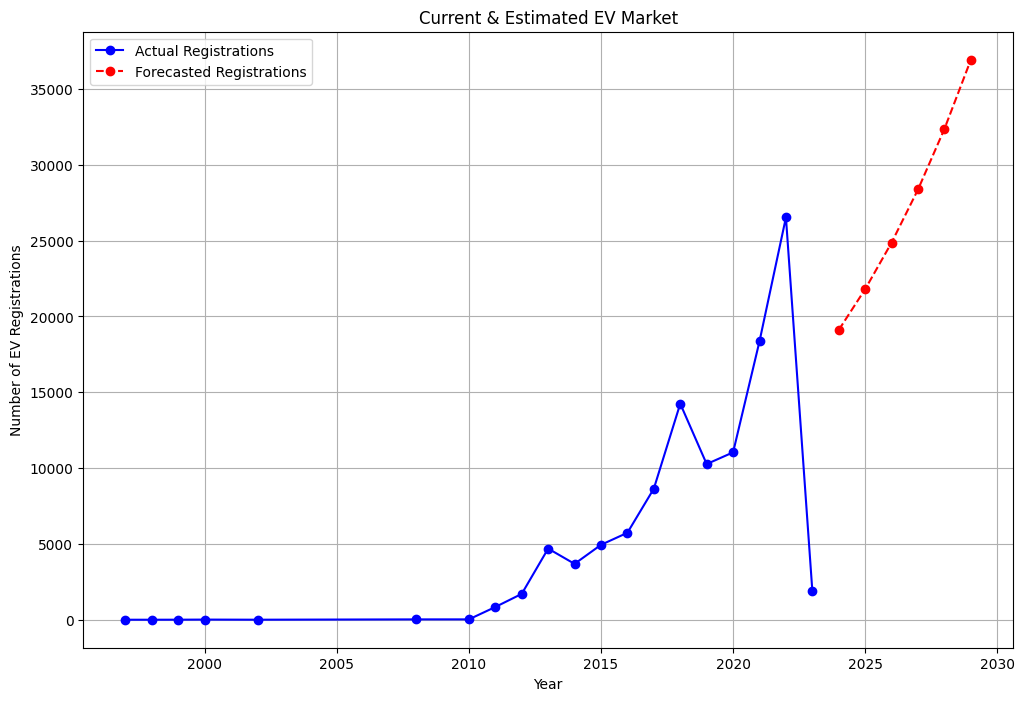

In [31]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()